**Programa:** Maestría en Big Data & Data Science

**Curso:** Minería de Datos

**Estudiante:** Sergio German Quispe

**"REDEFINIENDO EL MARKETING AUTOMOTRIZ: CLASIFICACIÓN Y SEGMENTACIÓN DE CLIENTES MEDIANTE REGRESION LOGISTICA"**

![Texto alternativo](https://blog.fmb.mx/hubfs/blog/OCTUBRE%202017/estrategia-de-marketing-automotriz.png)


#**SECCIÓN 1: PLANTEAMIENTO DE PROBLEMA Y OBJETIVO A ALCANZAR**

**1.1 CONTEXTO**: Una empresa de automóviles tiene planes de ingresar a nuevos mercados con sus productos existentes. Después de una intensa investigación de mercado, dedujeron que el comportamiento del nuevo mercado es similar al del mercado existente. En su mercado actual, el equipo de ventas ha clasificado a todos los clientes en 4 segmentos (A, B, C, D). La categoría A es quien tiene la mejor categoría económica y D la no tan mejor.

**1.2 SITUACION PROBLEMATICA**: La empresa enfrenta el desafío de requerimiento de un algoritmo que permita clasificar o segmentar los clientes de acuerdo con la categoría (A, B, C, D) al nuevo mercado. A pesar de las similitudes generales en el comportamiento del mercado, podría haber sutiles diferencias que podrían afectar la precisión del modelo de segmentación al aplicarlo al nuevo conjunto de clientes.


Adicional, necesitan la categorización de los nuevos clientes para poder enviarles ofertas promocionales de acuerdo con su categoría económica (A, B, C, D), así poder ofrecer productos premium a los que tienen una mejor categoría y generar mayores ingresos.


**1.3 OBJETIVOS**:

**Objetivo General**:

Implementar un algoritmo de clasificación que prediga con precisión el segmento al que pertenece un nuevo cliente en el mercado objetivo, usando la metodología KDD Process


**Objetivos Específicos**:

A)	Identificar las características claves que son determinantes en la clasificación de clientes

B)	Identificar y evaluar posibles riesgos asociados con la implementación del modelo

C)	Determinar si la cantidad de datos a usar es suficiente o es requerido más datos para lograr una buena precisión

D)	 Apoyar al área de ventas desarrollando el modelo para que puedan identificar oportunidades de ventas adicionales, como upselling (ofrecer productos premium) y cross-selling (ofrecer productos complementarios), para maximizar los ingresos por cliente de acuerdo con su categoría.


#**SECCIÓN 2: ELECCION DE LA BASE DE DATOS Y SELECCION DE DATOS UTILES**

##**2.1 ORIGEN DE LOS DATOS**

Los datos son obtenidos de la plataforma Kaggle , el dataset es de una empresa de automóviles anónima donde los datos son atributos o características de sus clientes, no hay información sensible ya que se maneja el ID. El dataset se llama [Customer Segmentation Classification](https://www.kaggle.com/datasets/kaushiksuresh147/customer-segmentation?resource=download&select=Train.csv), se cuenta con una data para train y una data para test, ambos en formato csv.

##**2.2 TAMAÑO Y CARACTERISTICAS DE LOS DATOS DE ORIGEN**

Los datos de train constan con un total de 8068 datos y los datos de test con un total de 2627 datos. No es una data pesada por lo cual no se requiere una buena máquina con buen procesador o Ram, es data promedio.


In [16]:
#importar librerias a usar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [17]:
#total de datos en train
dataset_train = pd.read_csv('https://raw.githubusercontent.com/SergioGerman412/Data-actividades-VIU/main/Train.csv')
print(f"Cantidad de datos en train: {len(dataset_train)}")

Cantidad de datos en train: 8068


In [18]:
#total de datos en test
dataset_test = pd.read_csv('https://raw.githubusercontent.com/SergioGerman412/Data-actividades-VIU/main/Test.csv')
print(f"Cantidad de datos en test: {len(dataset_test)}")

Cantidad de datos en test: 2627


El dataset cuenta con los siguientes atributos:

A)	**Datos categóricos:**

-	Gender: Género del cliente
-	Ever_Married: Estatus mariscal (si es casado o no)
-	Graduated: Si el cliente es graduado o no
-	Profession: Profesión del cliente
-	Spending_Score: Rango de gasto del cliente

B)	 **Datos numéricos:**

-	ID: Identificador del cliente
-	Age: Edad del cliente
-	Work_Experience: Años de experiencia del cliente
-	Family_size: Tamaño de familia del cliente (1 indica vive solo)
-	Var_1: Categoría anonimizada del cliente
Segmentation: Etiqueta o variable objetivo de tipo categórico


In [19]:
# Obtener las columnas categóricas
columnas_categoricas = dataset_train.select_dtypes(include='object').columns.tolist()
print(f"Columnas Categóricas: {columnas_categoricas}")

Columnas Categóricas: ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1', 'Segmentation']


In [20]:
# Obtener las columnas numéricas
columnas_numericas = dataset_train.select_dtypes(exclude='object').columns.tolist()
print(f"Columnas Numéricas: {columnas_numericas}")

Columnas Numéricas: ['ID', 'Age', 'Work_Experience', 'Family_Size']


##**2.3 SELECCION DE DATOS**


Teniendo en cuenta las variables se plantea a usar todas al inicio , el ID se eliminaría después de analizar datos duplicados, ya que el ID es un campo que garantiza los datos únicos del cliente.
 Por lo cual se comenzaría a analizar los datos teniendo en cuenta 6 datos categóricos, 4 datos numéricos y 1 campo más que sería la etiqueta Segmentation.


In [21]:
#Duplicamos el dataset para no perder los datos originales:
data_train = dataset_train.copy()
data_train.head(2)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A


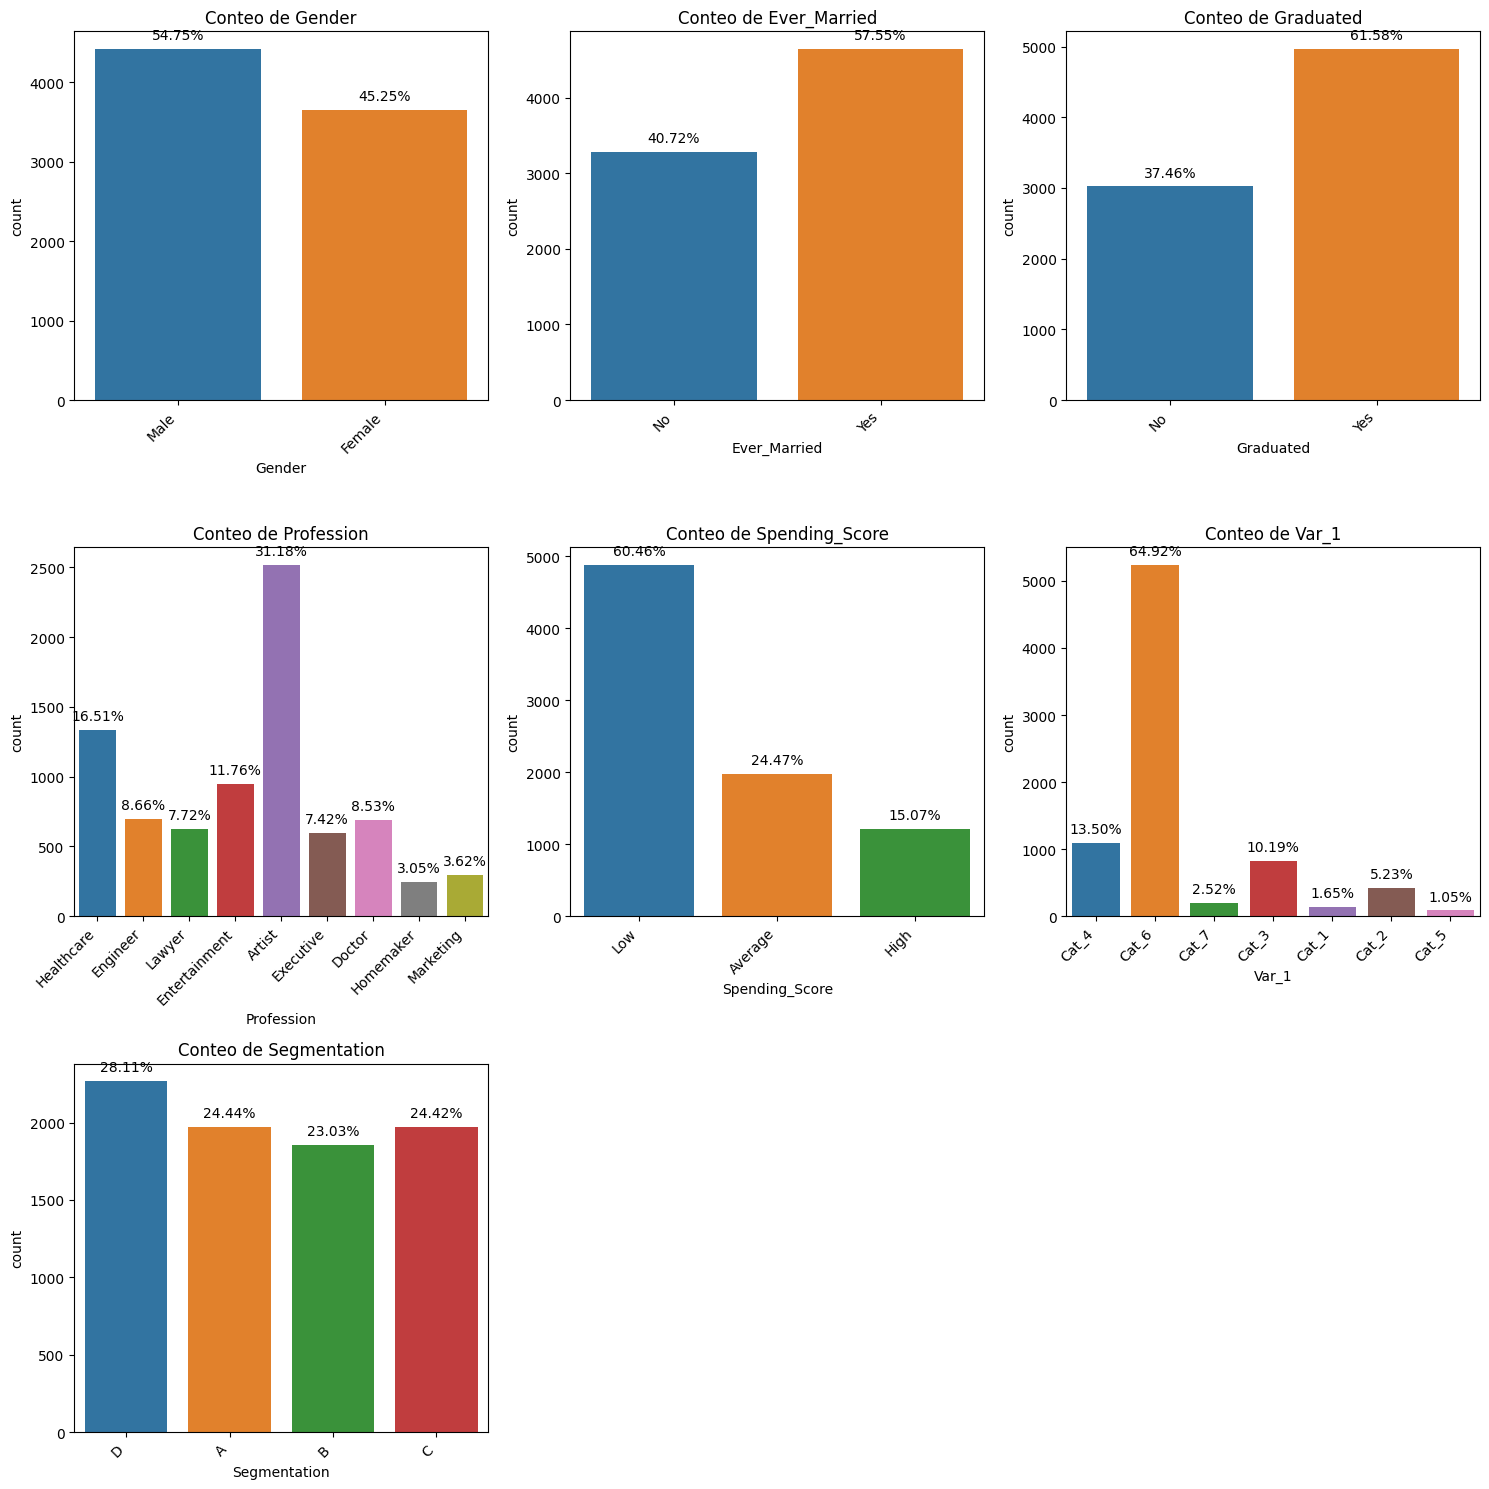

In [22]:
#Realizamos gráficas para conocer las columnas categóricas - su porcentaje

columnas_categoricas = data_train.select_dtypes(include='object').columns

# Configurar el número de filas y columnas para los subgráficos
num_filas = len(columnas_categoricas) // 3 + len(columnas_categoricas) % 3
num_columnas = 3

# Configurar el tamaño del gráfico según la cantidad de columnas
fig, axs = plt.subplots(nrows=num_filas, ncols=num_columnas, figsize=(15, 5 * num_filas))

# Asegurar que axs es una matriz bidimensional
if num_filas == 1:
    axs = axs.reshape(1, -1)

# Iterar sobre las columnas categóricas y crear gráficos de barras
for i, columna in enumerate(columnas_categoricas):
    ax = axs[i // num_columnas, i % num_columnas]
    sns.countplot(x=columna, data=data_train, ax=ax)
    ax.set_title(f'Conteo de {columna}')

    # Calcular porcentajes y agregar anotaciones
    total_por_categoria = len(data_train[columna])
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total_por_categoria) * 100
        ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    # Inclinar los nombres en el eje x para mejorar la visibilidad
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Eliminar subgráficos vacíos si el número de columnas no es múltiplo de 3
if len(columnas_categoricas) % 3 != 0:
    for j in range(len(columnas_categoricas) % 3, num_columnas):
        fig.delaxes(axs[-1, j])

plt.tight_layout()
plt.show()

*Interpretación en base a data train*:

1. Cómo se puede observar, la mayoría de los clientes tienen una profesión y son graduados con un 61.58%
2. La mayoría son casados con un 57.55%, motivo por el cual se tiene que analizar con la variable numérica Family_Size para ver si tiene relación
3. El 31.18% de los clientes son Artistas, 16.51% son Healthcare y 11.76% se dedican a la industria del entretenimiento
4. Mayormente los clientes tienen un puntaje bajo de gasto, 60.46% de ellos, podría implicar que han estado ahorrando para comprarse un automóvil
5. La mayoría de clientes tiene una categoría 6 de 64.92%
6. La etiqueta o variable objetivo se encuentra balanceada "Segmentation"

#**SECCIÓN 3: PREPROCESAMIENTO Y TRANSFORMACION DE DATOS**

##**3.1 DETECCION Y TRATAMIENTO DE VALORES NULOS**

En este apartado se busca detectar si hay datos nulos en el dataset, para esto puede ayudar el isna().sum() que sería útil para obtener la suma de nulos por cada campo del dataset.

In [23]:
#Elaboramos un bucle (repeticiones) para evaluar en cada columna isna y sum
for col in data_train.loc[:, data_train.isna().any()].columns:
  print('En la columna',col,'hay',data_train[col].isna().sum(),'valores nulos')

En la columna Ever_Married hay 140 valores nulos
En la columna Graduated hay 78 valores nulos
En la columna Profession hay 124 valores nulos
En la columna Work_Experience hay 829 valores nulos
En la columna Family_Size hay 335 valores nulos
En la columna Var_1 hay 76 valores nulos


En el caso de datos categóricos: Imputamos por la moda las variables categóricas ‘Ever_Married’, ‘Graduated’, ‘Profession’ y ‘Var_1’, teniendo en cuenta que no hay demasiados datos nulos, ya que si es considerable y reemplazamos por el valor más repetitivo no sería una buena variable.

In [24]:
# Columnas categóricas a imputar por la moda
columnas_categoricas_nulos = ['Ever_Married', 'Graduated', 'Profession', 'Var_1']

# Imputación para columnas categóricas
imputador_categorico = SimpleImputer(strategy='most_frequent')
data_train[columnas_categoricas_nulos] = imputador_categorico.fit_transform(data_train[columnas_categoricas_nulos])
data_train.isna().sum()

ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession           0
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1                0
Segmentation         0
dtype: int64

En el caso de los datos numéricos ‘Work_Experience’ y ‘Family_Size’, se opta imputar por la mediana ya que es menos sensible a outliers y proporciona una estimación más robusta del centro de la distribución.

In [25]:
# Columnas numéricas a imputar por la mediana
columnas_numericas_nulos = ['Work_Experience', 'Family_Size']

imputador_numerico = SimpleImputer(strategy='median')
data_train[columnas_numericas_nulos] = imputador_numerico.fit_transform(data_train[columnas_numericas_nulos])
data_train.isna().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

##**3.2 DETECCION Y TRATAMIENTO DE DATOS DUPLICADOS**

En este apartado analizamos los valores duplicados, para ello contamos con el ID de cliente que nos garantiza la unicidad de los datos.

In [26]:
#Verificamos si hay datos duplicados en el dataset
data_train.duplicated().sum()

0

Una vez hemos pasado esta etapa, se elimina el campo ID ya que se considera que no aporta más al modelo.

In [27]:
#eliminamos las variables que no son significativas en mi modelo
data_train.drop(['ID'], axis = 1,inplace=True)

##**3.3 ENCODEAR VARIABLES CATEGORICAS**

En el dataset se cuenta con las siguiente variables catégoricas: Gender, Ever_Married, Graduated, Profession, Spending_Score.  Se encodea debido a que hay algoritmos de clasificación como la regresión logística que es un algoritmo que generalmente requiere que las variables categóricas sean codificadas para su entrada.

In [28]:
df_categorical = data_train[['Gender', 'Ever_Married', 'Graduated', 'Profession','Spending_Score','Var_1', 'Segmentation']]

from sklearn import preprocessing
label = preprocessing.LabelEncoder()
df_categorical_encoded = pd.DataFrame()
# RECORREMOS CADA COLUMNA DEL DF_categorical
for i in df_categorical.columns:
  df_categorical_encoded[i]=label.fit_transform(df_categorical[i])

# Sobrescribir las columnas originales en el DataFrame data_train
data_train[['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1', 'Segmentation']] = df_categorical_encoded


#convertimos los datos float a int de la columna Family_Size y Work_Experience
data_train["Family_Size"] = data_train.Family_Size.astype(int)
data_train["Work_Experience"] = data_train.Work_Experience.astype(int)

data_train

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22,0,5,1,2,4,3,3
1,0,1,38,1,2,1,0,3,3,0
2,0,1,67,1,2,1,2,1,5,1
3,1,1,67,1,7,0,1,2,5,1
4,0,1,40,1,3,1,1,6,5,0
...,...,...,...,...,...,...,...,...,...,...
8063,1,0,22,0,0,0,2,7,0,3
8064,1,0,35,0,4,3,2,4,3,3
8065,0,0,33,1,5,1,2,1,5,3
8066,0,0,27,1,5,1,2,4,5,1


##**3.4 ANALISIS UNIVARIANTE**

Se realiza el análisis univariante para conocer la distribución de cada variable que es mediante un histograma. La razón de hacer esto es que algunos modelos estadísticos y algoritmos de machine learning asumen que los datos siguen una distribución normal o en todo caso se benefician de ello, ya que se plantea usar Regresión logística ya que podría ser buena opción si los datos siguen una distribución normal.

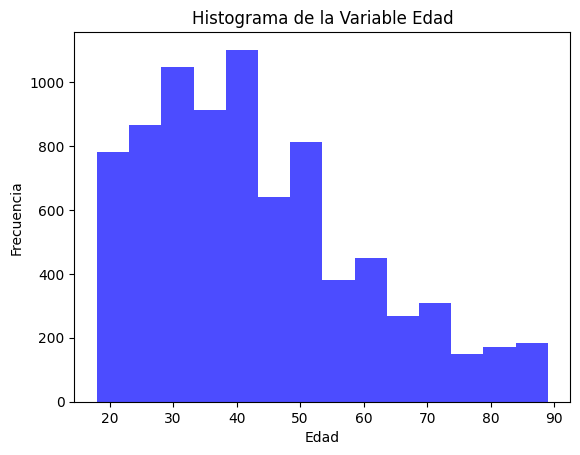

In [29]:
# Calcular el número de bins según la regla de Sturges
num_bins = int(np.ceil(1 + np.log2(len(data_train['Age']))))

# Crear el histograma con el número calculado de bins
plt.hist(data_train['Age'], bins=num_bins, color='blue', alpha=0.7)

# Agregar título y etiquetas
plt.title('Histograma de la Variable Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

In [30]:
import scipy.stats as stats

# Realiza la prueba de Shapiro-Wilk
stat, p_value = stats.shapiro(data_train['Age'])

# Muestra los resultados
print("Estadístico de prueba:", stat)
print("Valor p:", p_value)


Estadístico de prueba: 0.9512645602226257
Valor p: 1.401298464324817e-45


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


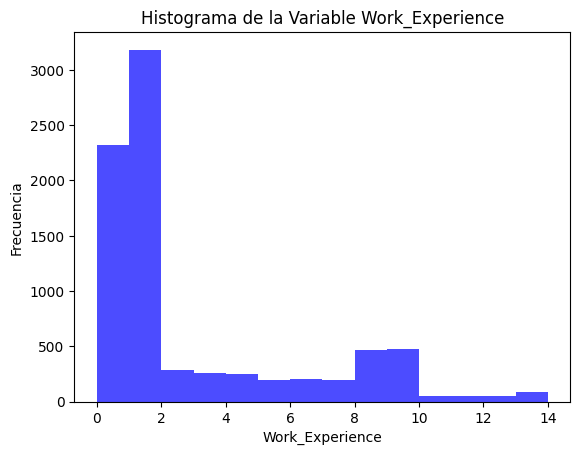

In [31]:
# Calcular el número de bins según la regla de Sturges
num_bins = int(np.ceil(1 + np.log2(len(data_train['Work_Experience']))))

# Crear el histograma con el número calculado de bins
plt.hist(data_train['Work_Experience'], bins=num_bins, color='blue', alpha=0.7)

# Agregar título y etiquetas
plt.title('Histograma de la Variable Work_Experience')
plt.xlabel('Work_Experience')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

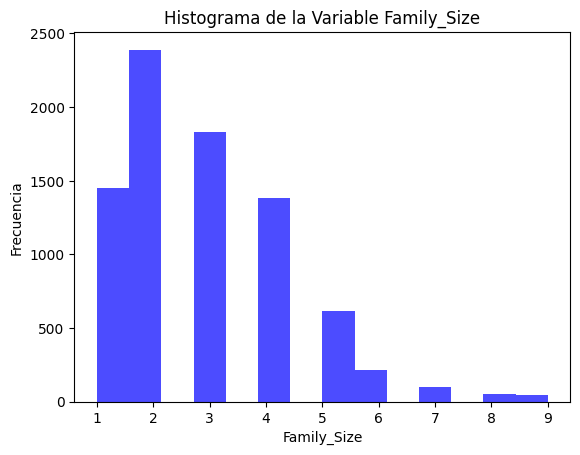

In [32]:
# Calcular el número de bins según la regla de Sturges
num_bins = int(np.ceil(1 + np.log2(len(data_train['Family_Size']))))

# Crear el histograma con el número calculado de bins
plt.hist(data_train['Family_Size'], bins=num_bins, color='blue', alpha=0.7)

# Agregar título y etiquetas
plt.title('Histograma de la Variable Family_Size')
plt.xlabel('Family_Size')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

Las variables no siguen una distribución normal, por lo cual, la regresión logística puede ser una opción sólida para clasificar la categoría del cliente, incluso si los datos no siguen una distribución normal.

##**3.5 DETECCION Y TRATAMIENTO DE OUTLIERS**

Para la detección de outliers se puede optar por hacer un diagrama de caja (boxplot), y adicional se complementa con el análisis univariante para analizar si en las variables se cuenta con outliers o no.

<Figure size 1200x1600 with 0 Axes>

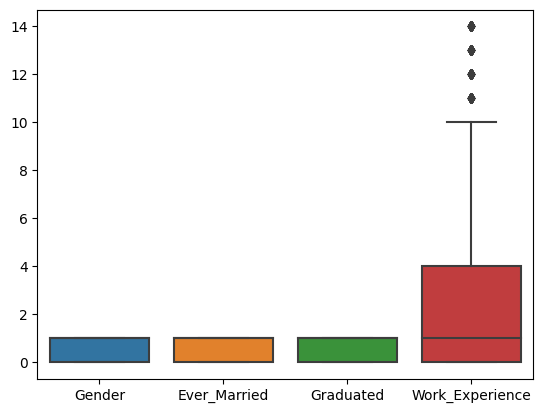

<Figure size 1200x1600 with 0 Axes>

In [33]:
boxplot1 = data_train[['Gender', 'Ever_Married', 'Graduated', 'Work_Experience']]
sns.boxplot(data=boxplot1)
plt.figure(figsize=(12,16))

Como se puede apreciar, en 'Work_Experience' tenemos datos alejados por lo cual se continua analizando para determinar si son outliers o no

In [34]:
boxplot1['Work_Experience'].unique()

array([ 1,  0,  4,  9, 12,  3, 13,  5,  8, 14,  7,  2,  6, 10, 11])

In [35]:
boxplot1['Work_Experience'].value_counts()

1     3183
0     2318
9      474
8      463
2      286
3      255
4      253
6      204
7      196
5      194
10      53
11      50
12      48
13      46
14      45
Name: Work_Experience, dtype: int64

La mayoría de los valores se concentran en los primeros rangos (hasta el 9), y hay un descenso significativo después de eso, en este caso podría no ser apropiado considerar los valores más altos como outliers en el sentido tradicional.

Los valores más altos, como 10, 11, 12, 13, 14, aunque menos frecuentes, no necesariamente son outliers anómalos si representan categorías válidas o casos reales en el dominio. Podrían ser personas con una experiencia laboral más extensa que es menos común pero aún válida.

<Figure size 1200x1600 with 0 Axes>

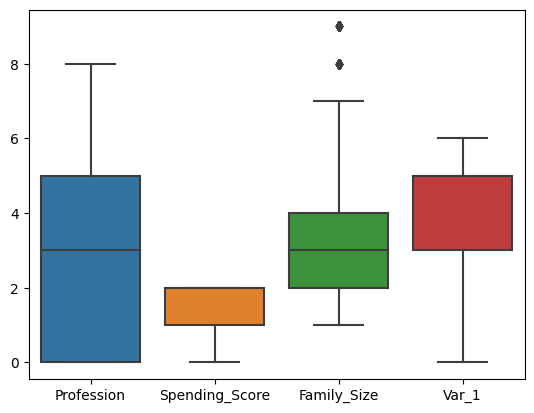

<Figure size 1200x1600 with 0 Axes>

In [36]:
boxplot2 = data_train[['Profession', 'Spending_Score', 'Family_Size', 'Var_1']]
sns.boxplot(data=boxplot2)
plt.figure(figsize=(12,16))

Mismo caso, no consideramos outliers las variables de este boxplot2

<Figure size 1200x1600 with 0 Axes>

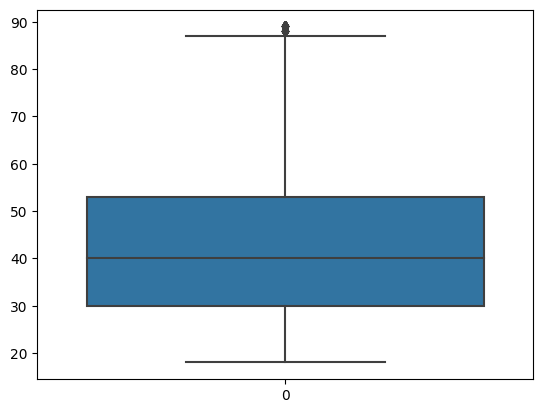

<Figure size 1200x1600 with 0 Axes>

In [37]:
sns.boxplot(data=data_train['Age'])
plt.figure(figsize=(12,16))

In [38]:
data_train['Age'].unique()

array([22, 38, 67, 40, 56, 32, 33, 61, 55, 26, 19, 70, 58, 41, 31, 79, 49,
       18, 36, 35, 45, 42, 83, 27, 28, 47, 29, 57, 76, 25, 72, 48, 74, 59,
       39, 51, 30, 63, 52, 60, 68, 86, 50, 43, 80, 37, 46, 69, 78, 71, 82,
       23, 20, 85, 21, 53, 62, 75, 65, 89, 66, 73, 77, 87, 84, 81, 88])

In [39]:
data_train['Age'].value_counts()

35    250
37    234
33    232
42    232
40    229
     ... 
78     29
87     28
76     27
80     24
85     22
Name: Age, Length: 67, dtype: int64

En este contexto, tratar a los clientes con edad avanzada como outliers podría no ser apropiado, ya que representan una parte sustancial del conjunto de datos, ya que se visualiza que clientes de 78 años han comprado 29 automóviles, de 80 años han comprado 25 y 85 años han comprado 22.

En el caso que solo hubieran comprado entre 1 a 5 aprox, o un número relativamente bajo de acuerdo al total de clientes, ahi si lo hubiera considerado outlier de acuerdo a mi criterio

##**3.6 ANALISIS DE CORRELACION**

En este punto, debemos detectar la correlación entre variables ya que debemos evitar a toda costa variables con correlación alta, porque significa que están introduciendo problemas al modelo que luego entrenaremos para resolver el problema.

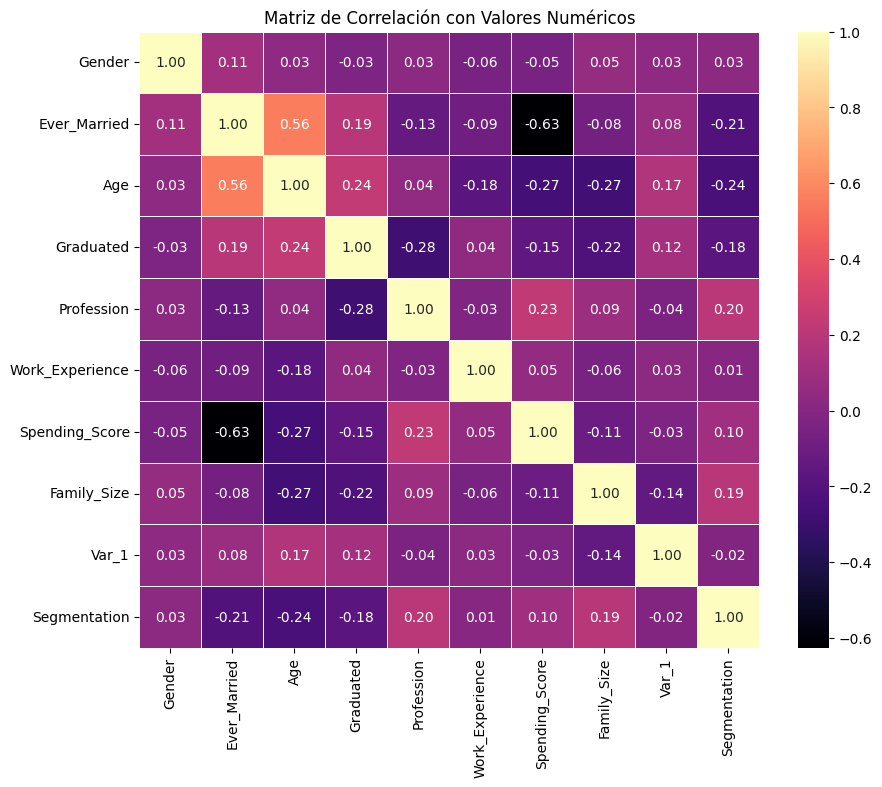

In [40]:
# Calcular la matriz de correlación
correlation_matrix = data_train.corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Crear la matriz de correlación con valores numéricos
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f", linewidths=0.5)

# Agregar título
plt.title('Matriz de Correlación con Valores Numéricos')

# Mostrar el gráfico
plt.show()

Se vé que hay una relación moderada entre "Graduated" y "Ever_Married". A su vez, La correlación entre "Spending_Score" y "Ever_Married" también indica una relación moderada, pero en este caso, la correlación es negativa, lo que sugiere una relación inversa entre estas dos variables. Cuando una variable aumenta, la otra tiende a disminuir.

Una correlación débil indica que las variables no están linealmente relacionadas entre sí. Esto puede ser beneficioso si estás construyendo un modelo de regresión logística, ya que la independencia de las variables predictoras puede ayudar a evitar problemas de multicolinealidad.

##**3.7 NORMALIZACION DE DATOS**

La regresión logística no es tan sensible a las diferencias de escala como algunos otros algoritmos, como la regresión lineal. Sin embargo, la normalización puede facilitar la interpretación de los coeficientes y ayudar en la convergencia del algoritmo

In [41]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_train['Age'] = scaler.fit_transform(data_train[['Age']])
data_train

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,0.056338,0,5,1,2,4,3,3
1,0,1,0.281690,1,2,1,0,3,3,0
2,0,1,0.690141,1,2,1,2,1,5,1
3,1,1,0.690141,1,7,0,1,2,5,1
4,0,1,0.309859,1,3,1,1,6,5,0
...,...,...,...,...,...,...,...,...,...,...
8063,1,0,0.056338,0,0,0,2,7,0,3
8064,1,0,0.239437,0,4,3,2,4,3,3
8065,0,0,0.211268,1,5,1,2,1,5,3
8066,0,0,0.126761,1,5,1,2,4,5,1


In [42]:
#Definimos train y test para posterior crear el modelo predictivo (una vez el PreProcesamiento sea considerado que esté  bien, se plantea usar el algoritmo Regresión Logística posteriormente)
X_train = data_train.drop(['Segmentation'], axis=1)
y_train = data_train['Segmentation']
X_test  = data_train.drop(['Segmentation'], axis=1)
y_test  = data_train['Segmentation']